In [554]:
import pandas as pd
import matplotlib.pyplot as plt

df_despesas = pd.read_excel('./limpo/despesas_limpo.xlsx')
df_orcamentos = pd.read_excel('./limpo/orcamentos_limpo.xlsx')

In [555]:
# Visualização despesas

df_despesas




,id_despesas,data,tipo,setor,valor,fornecedor,trimestre,mensal
0,1,2024-08-18,salário,financeiro,11670.10,teixeira,3,8
1,2,2024-09-15,água,logística,17394.82,nunes,3,9
2,3,2024-08-22,água,financeiro,19787.46,moura_s/a,3,8
3,4,2024-09-02,compra_matéria-prima,produção,2159.77,barros,3,9
4,5,2025-02-02,internet,rh,7390.20,mendes_ei,1,2
...,...,...,...,...,...,...,...,...
195,196,2024-10-03,energia,produção,15225.10,da_cunha_mendes_e_filhos,4,10
196,197,2024-07-19,salário,rh,16460.68,pires_e_filhos,3,7
197,198,2024-10-27,água,financeiro,12795.28,nascimento,4,10
198,199,2024-08-17,compra_matéria-prima,logística,9634.17,da_costa,3,8


In [556]:
# Visualização orcamentos

df_orcamentos

,setor,mes,ano,valor_previsto,valor_realizado,data,trimestre
0,producão,1,2024,14045.42,15524.52,2024-01-01,1
1,producão,2,2024,42597.50,45075.42,2024-02-01,1
2,producão,3,2024,39491.52,44155.59,2024-03-01,1
3,producão,4,2024,52992.06,59965.36,2024-04-01,2
4,producão,5,2024,16198.93,15988.45,2024-05-01,2
...,...,...,...,...,...,...,...
115,comercial,8,2025,73532.49,63496.66,2025-08-01,3
116,comercial,9,2025,46526.55,270703.31,2025-09-01,3
117,comercial,10,2025,42068.07,43491.56,2025-10-01,4
118,comercial,11,2025,79706.26,92876.93,2025-11-01,4


trimestre
1    1492384.53
2    1862988.02
3    1962907.30
4    2002396.66
Name: valor_realizado, dtype: float64


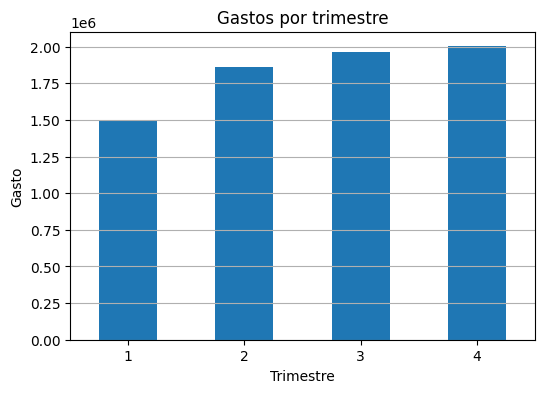

In [557]:
# Qual o perfil de gastos nos últimos trimestres? Alguma sazonalidade? 

gasto_por_trimestre = df_orcamentos.groupby('trimestre')['valor_realizado'].sum()
print(gasto_por_trimestre)
gasto_por_trimestre.plot(kind='bar', figsize=(6,4))
plt.title('Gastos por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Gasto')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show() 


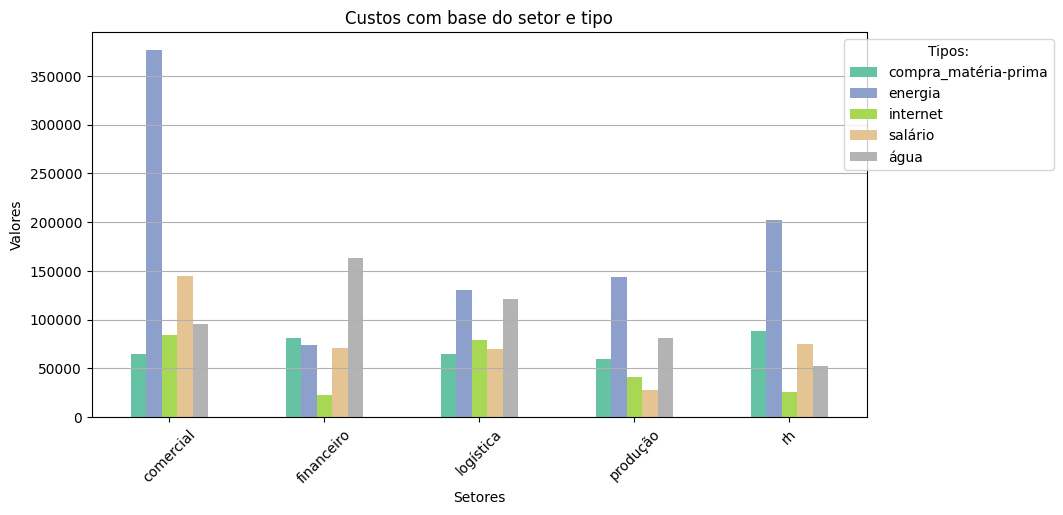

In [558]:
# Quais áreas têm maior custo com pessoal, materiais, logística? 

setor_por_tipo = df_despesas.groupby(['setor', 'tipo'])['valor'].sum().unstack()

setor_por_tipo.plot(kind='bar', colormap='Set2',figsize=(10,5))
plt.title('Custos com base do setor e tipo')
plt.xlabel('Setores')
plt.ylabel('Valores')
plt.legend(title = "Tipos:",loc='upper right', bbox_to_anchor=(1.25, 1) )
plt.xticks(rotation=45)
plt.grid(axis= 'y')
plt.show()

In [559]:
# Há fornecedores ou categorias com variações anormais de custo?  

import numpy as np

media_valor = df_despesas.groupby('fornecedor')['valor'].mean().fillna(0).round(2)

valor_q1 = df_despesas['valor'].quantile(0.25)
valor_q3 = df_despesas['valor'].quantile(0.75)
valor_iqr = valor_q3 - valor_q1

valor_limite_minimo = valor_q1 - 1.5 * valor_iqr
valor_limite_maximo = valor_q3 + 1.5 * valor_iqr

outliers_valor_abaixo = df_despesas[df_despesas['valor'] < valor_limite_minimo]
outliers_valor_acima = df_despesas[df_despesas['valor'] > valor_limite_maximo]


print("Fornecedor com custo abaixo do esperado:")
display(outliers_valor_abaixo)

print("Fornecedor com custo acima do esperado:")
display(outliers_valor_acima)

Fornecedor com custo abaixo do esperado:


,id_despesas,data,tipo,setor,valor,fornecedor,trimestre,mensal


Fornecedor com custo acima do esperado:


,id_despesas,data,tipo,setor,valor,fornecedor,trimestre,mensal
59,60,2025-01-02,energia,comercial,190090.0,fogaça,1,1
67,68,2024-10-29,compra_matéria-prima,comercial,45438.4,pastor_s/a,4,10
126,127,2024-10-24,energia,logística,39788.7,fonseca_s/a,4,10
141,142,2024-06-08,energia,rh,103679.4,viana_me,2,6
147,148,2024-07-16,salário,comercial,101064.7,sales_ei,3,7
160,161,2025-03-12,energia,produção,96075.5,santos_s/a,1,3


setor   comercial  financeiro  logística   produção         rh
mensal                                                        
1       245124.70    19795.63   18342.52   16608.31   16686.15
2        28350.27    14384.13   31081.08   21476.68   29592.38
3        29699.14    49091.72   30893.58  166056.22    8073.66
4        56149.82    36925.76   57646.99   23940.23   17748.44
5        28896.70    12528.52   31522.23   18764.93   44545.73
6        17343.14    42100.92   28409.79   19664.70  165445.50
7       144492.95    39321.94   24015.22        NaN   36130.05
8        56296.87    65849.93   24709.82   16178.88   38056.50
9        30436.48    49139.86   55577.31   20255.46   12947.54
10       61097.00    47968.33   90713.67   27708.09   25884.03
11        4004.41    19851.48   54005.23    3302.72       0.00
12       63066.88    14224.73   17124.16   18719.07   47628.58


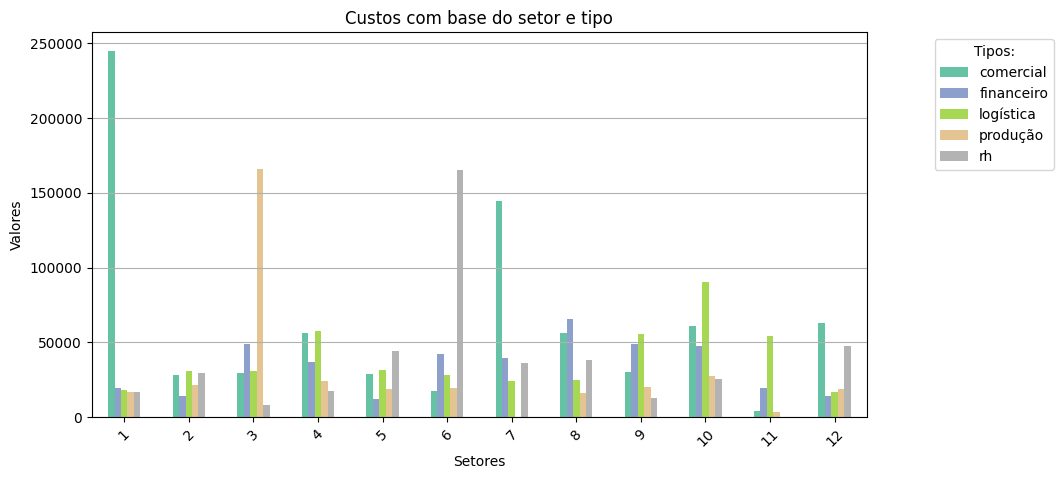

In [560]:
# Como estão distribuídas as despesas mensais por área (RH, transporte, comercial...)?

valor_por_setor = df_despesas.groupby(['mensal', 'setor'])['valor'].sum().unstack()
print(valor_por_setor)

valor_por_setor.plot(kind='bar', colormap='Set2',figsize=(10,5))
plt.title('Custos com base do setor e tipo')
plt.xlabel('Setores')
plt.ylabel('Valores')
plt.legend(title = "Tipos:",loc='upper right', bbox_to_anchor=(1.25, 1) )
plt.xticks(rotation=45)
plt.grid(axis= 'y')
plt.show()